# Examining Datasets for Training Robojam



In [1]:
import numpy as np
import math
import h5py
import random
import time
import pandas as pd
from context import * # imports MDN
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('seaborn-talk')

Using TensorFlow backend.


Loaded perfs: 1626 and 1626
Num touches: 249870


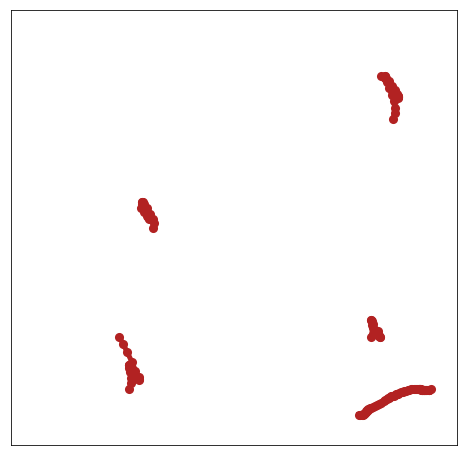

In [2]:
### Test Loading from the saved datafile.
with np.load('../datasets/tiny_performance_datasets.npz') as loaded:
    loaded_raw = loaded['raw_perfs']
    loaded_diff = loaded['diff_perfs']
    
print("Loaded perfs:", len(loaded_raw), "and", len(loaded_diff))
print("Num touches:", np.sum([len(l) for l in loaded_raw]))

corpus = []

for l in loaded_raw:
    corpus.append(l[:,:-1])
    
    
# Plot a bit of the data to have a look:
robojam.plot_2D(robojam.perf_array_to_df(random.choice(corpus)))

In [ ]:
display(random.choice(loaded_raw)[:15])
display(random.choice(metatone_raw)[:15])

In [ ]:
robojam.plot_2D(robojam.perf_array_to_df(random.choice(loaded_raw)))

In [7]:
### Test Loading from the saved datafile.
with np.load('../datasets/metatone_dataset.npz') as loaded:
    metatone_raw = loaded['raw_perfs']
    metatone_diff = loaded['diff_perfs']
    
print("Loaded perfs:", len(metatone_raw), "and", len(metatone_diff))
print("Num touches:", np.sum([len(l) for l in metatone_raw]))

corpus = []

for l in metatone_raw:
    corpus.append(l[:,:-1])

Loaded perfs: 548 and 548
Num touches: 4298418


In [ ]:
# Plot a bit of the data to have a look:
robojam.plot_2D(robojam.perf_array_to_df(random.choice(corpus)))

In [ ]:
p = random.choice(loaded_raw)
len(p.T)

In [8]:
SEQ_LEN = 100
STP_SIZE = 10
corpus = metatone_raw

# Restrict corpus to sequences longer than the corpus.
corpus = [l for l in corpus if len(l) > SEQ_LEN+1]
print("Corpus Examples:", len(corpus))

# Prepare training data as X and Y.
slices = []
for seq in corpus:
    slices += robojam.slice_sequence_examples(seq, SEQ_LEN+1, step_size=STP_SIZE)

X, y = robojam.seq_to_overlapping_format(slices)

X = np.array(X) * robojam.SCALE_FACTOR
y = np.array(y) * robojam.SCALE_FACTOR

print("Number of training examples:")
print("X:", X.shape)
print("y:", y.shape)


Corpus Examples: 524
Number of training examples:
X: (424784, 100, 4)
y: (424784, 100, 4)


In [5]:
corpus = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(len(corpus))
robojam.slice_sequence_examples(corpus, 3, step_size=2)

10


[[0, 1, 2], [2, 3, 4], [4, 5, 6], [6, 7, 8]]